# 1D Poisson equation with mixed and periodic boundary conditions

We first implement a finite-difference solver for  

$$
\begin{align}
 &- \phi''(x) = \rho(x)\,,\qquad x\in (a,b) \subset \mathbb R\,,
 \\[1mm]
 &\phi(a) = \alpha\,,\quad \phi'(b) = \gamma\,.
\end{align}
$$

See the [second exercise sheet](http://www-m16.ma.tum.de/foswiki/pub/M16/Allgemeines/CompPlasmaPhys22/exercise02.pdf) for details.

In [5]:
import numpy as np
import matplotlib.pyplot as plt


Approximating the boundary term with

$$
\phi'(x_N) = \frac{1}{h} \left(\phi_N - \phi_{N-1}\right)
$$

N =    8
L1-error:,  9.3087128
L2-error:  9.7605326
Linf-error: 14.1840484
smallest eigenvalue:   0.0552059

N =   16
L1-error:,  4.2519850
L2-error:  4.6821191
Linf-error:  7.4269177
smallest eigenvalue:   0.0587251

N =   32
L1-error:,  2.0303237
L2-error:  2.2897822
Linf-error:  3.7949352
smallest eigenvalue:   0.0605799

N =   64
L1-error:,  0.9918540
L2-error:  1.1319121
Linf-error:  1.9176994
smallest eigenvalue:   0.0615317

N =  128
L1-error:,  0.4901752
L2-error:  0.5626940
Linf-error:  0.9638991
smallest eigenvalue:   0.0620138

N =  256
L1-error:,  0.2436590
L2-error:  0.2805295
Linf-error:  0.4832114
smallest eigenvalue:   0.0622564

N =  512
L1-error:,  0.1214735
L2-error:  0.1400601
Linf-error:  0.2419211
smallest eigenvalue:   0.0623781

N = 1024
L1-error:,  0.0606479
L2-error:  0.0699789
Linf-error:  0.1210394
smallest eigenvalue:   0.0624390

convergence rate with L1: 1.0374257673955414
convergence rate with L2: 1.0176995244377318
convergence rate with Linf: 0.98180694

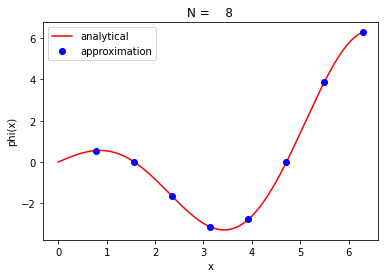

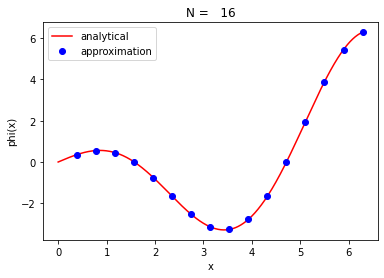

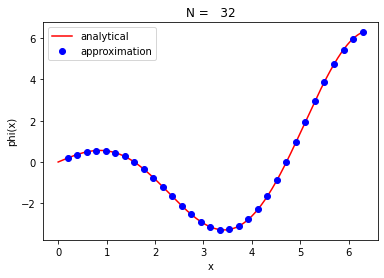

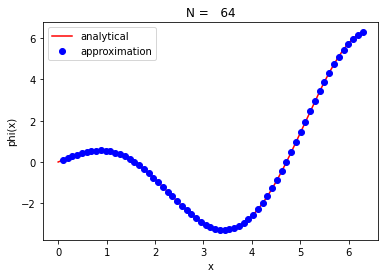

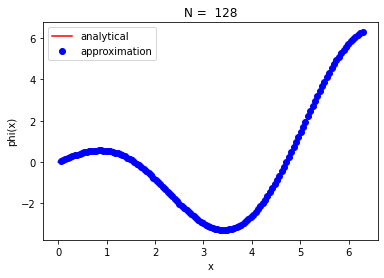

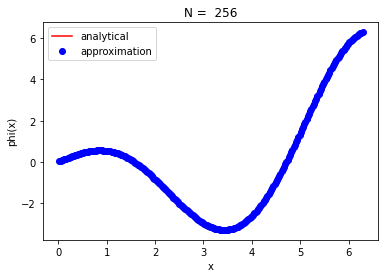

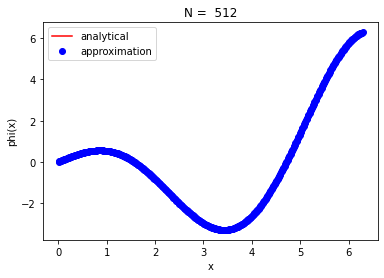

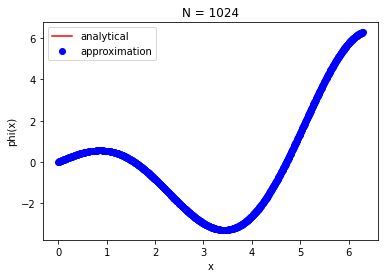

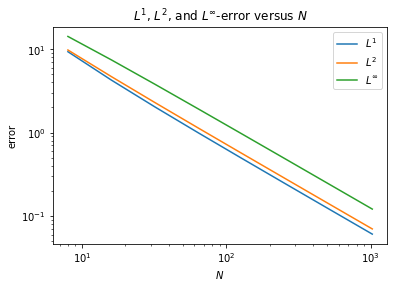

In [3]:
# Discretize the domain
a = 0
b = 2*np.pi
L = b-a
N_vec = [2**k for k in range(3,11)]

# boundary conditions:
alpha = 0  # value of solution at x=a
gamma = 1  # value of derivative at x=b

# analytical solution (for testing purposes):
phi_ana = lambda x: x*np.cos(x)

# method of manufactured solutions: 
# insert analytical solution into Poisson equation to compute the rhs.
rho = lambda x: 2*np.sin(x) + x*np.cos(x)

# create array to save errors
L1_arr  = np.empty( len(N_vec) )
L2_arr  = np.empty( len(N_vec) )
Linf_arr = np.empty( len(N_vec) )

#create continuous mesh and analytical solution for nice plot
x_cont   = np.linspace(a,b,1000)
phi_cont = phi_ana( x_cont )

# do the convergence study:
for k,N in enumerate(N_vec):
    
    # grid:
    x_arr = np.linspace(a,b,N+1)
    h = L/N
    
    # matrix assembly:
    v0 = np.ones(N)*(2)
    v1 = np.ones(N-1)*(-1) #np.diag(np.ones(N-1)*(-1), k = 1)
    Ah = np.diag(v0) + np.diag(v1, 1) + np.diag(v1, -1)
    Ah[-1][-1] = 1 # boundary condition
    # print(Ah, '\n')
    Ah /= h**2
    
    # Compute eigenvalues
    eig_vals = np.linalg.eigvals(Ah)
    
    # right-hand side:
    rhs   = rho(x_arr[1:])
    rhs[0] += alpha / h**2  # boundary condition (alpha = 0)
    rhs[-1]    = gamma / h  # boundary condition
    
    # solve linear system:
    phi_h = np.linalg.solve(Ah, rhs)
    
    # compare to the analytical solution at the grid points:
    phi = phi_ana(x_arr[1:])
    
    L1_err   = np.sum( np.abs( phi-phi_h ) )/(N-1)
    L2_err   = np.sqrt( np.sum( np.abs( phi-phi_h )**2 )/(N-1) )
    Linf_err = np.max( np.abs( phi-phi_h ) )
    
    # Print out N, the errors and smallest eigenvalue
    print( 'N = {:4d}'.format(N))
    print('L1-error:, {:10.7f}'.format(L1_err))
    print('L2-error:','{:10.7f}'.format(L2_err))
    print('Linf-error:','{:10.7f}'.format(Linf_err))
    print('smallest eigenvalue: ', '{:10.7f}'.format(np.min(np.abs(eig_vals))))
    print()
    
    L1_arr[k]   = L1_err
    L2_arr[k]   = L2_err
    Linf_arr[k] = Linf_err
    
    plt.figure()
    plt.plot(x_cont, phi_cont, 'r-', label='analytical')
    plt.plot(x_arr[1:], phi , 'ob', label='approximation')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('phi(x)')
    plt.title('N = {:4d}'.format(N))
    
plt.figure()
plt.plot(N_vec, L1_arr, label='$L^1$')
plt.plot(N_vec, L2_arr, label='$L^2$')
plt.plot(N_vec, Linf_arr, label='$L^\infty$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('$N$')
plt.ylabel('error')
plt.title('$L^1$, $L^2$, and $L^\infty$-error versus $N$')

L1_rate = -(np.log(L1_arr[0]) - np.log(L1_arr[-1])) / (np.log(N_vec[0]) - np.log(N_vec[-1]))
L2_rate = -(np.log(L2_arr[0]) - np.log(L2_arr[-1])) / (np.log(N_vec[0]) - np.log(N_vec[-1]))
Linf_rate = -(np.log(Linf_arr[0]) - np.log(Linf_arr[-1])) / (np.log(N_vec[0]) - np.log(N_vec[-1]))

print('convergence rate with L1:', L1_rate)
print('convergence rate with L2:', L2_rate)
print('convergence rate with Linf:', Linf_rate)

Now we use a different approximation for the boundary term, namely:

$$
\phi'(x_N) = \frac{1}{h} \left( c_1 \phi_N - c_2 \phi_{N-1} + c_3 \phi_{N-2} \right) + \mathcal{O}(h^3)
$$

N =    8
L1-error:,  5.3855836
L2-error:  5.6436943
Linf-error:  8.0814031
smallest eigenvalue:   0.0495816

N =   16
L1-error:,  0.9824953
L2-error:  1.0814516
Linf-error:  1.6572298
smallest eigenvalue:   0.0553790

N =   32
L1-error:,  0.1983775
L2-error:  0.2237629
Linf-error:  0.3530967
smallest eigenvalue:   0.0587665

N =   64
L1-error:,  0.0436973
L2-error:  0.0498994
Linf-error:  0.0797343
smallest eigenvalue:   0.0605899

N =  128
L1-error:,  0.0101913
L2-error:  0.0117101
Linf-error:  0.0188146
smallest eigenvalue:   0.0615341

N =  256
L1-error:,  0.0024566
L2-error:  0.0028315
Linf-error:  0.0045607
smallest eigenvalue:   0.0620144

N =  512
L1-error:,  0.0006028
L2-error:  0.0006958
Linf-error:  0.0011221
smallest eigenvalue:   0.0622565

N = 1024
L1-error:,  0.0001493
L2-error:  0.0001725
Linf-error:  0.0002783
smallest eigenvalue:   0.0623781

convergence rate with L1: 2.1480014274916766
convergence rate with L2: 2.1309610215260486
convergence rate with Linf: 2.11107263

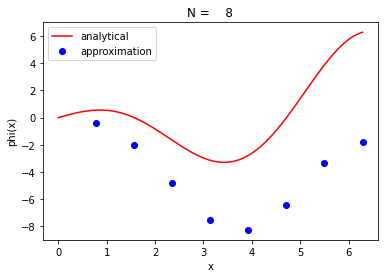

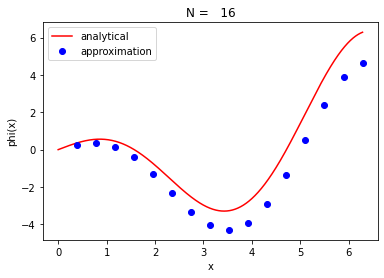

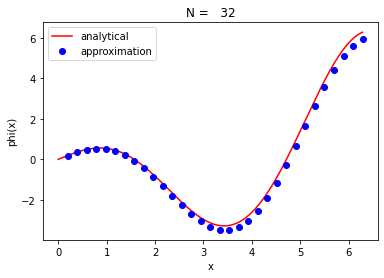

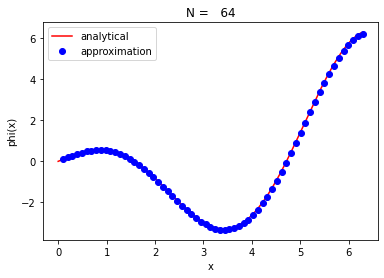

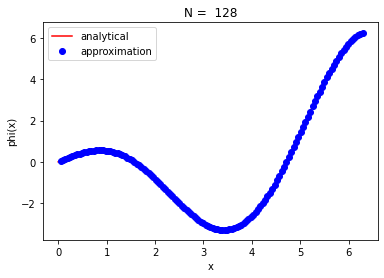

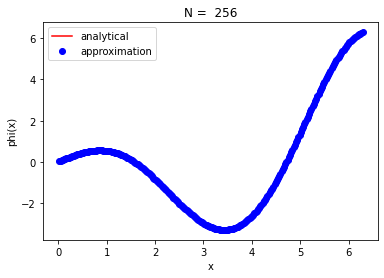

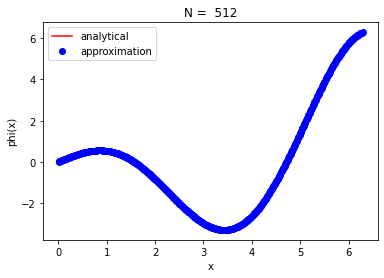

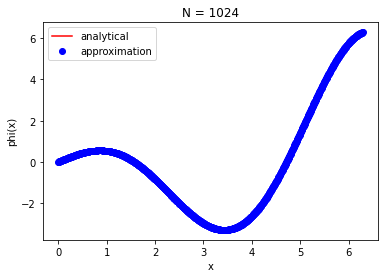

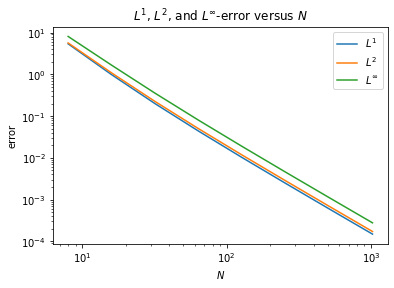

In [32]:
# do the convergence study:
for k,N in enumerate(N_vec):
    
    # grid:
    x_arr = np.linspace(a,b,N+1)
    h = L/N
    
    c_3 = 0.5
    c_2 = -2.0
    c_1 = 1.5
    
    # matrix assembly:
    v0 = np.ones(N)*(2)
    v1 = np.ones(N-1)*(-1)
    Ah = np.diag(v0) + np.diag(v1, 1) + np.diag(v1, -1)
    Ah[-1,-3] = c_3   # boundary condition
    Ah[-1,-2] = c_2    # boundary condition
    Ah[-1,-1] = c_1    # boundary condition
    # print(Ah, '\n')
    Ah /= h**2
    
    # Compute eigenvalues
    eig_vals = np.linalg.eigvals(Ah)
    
    # right-hand side:
    rhs     = rho(x_arr[1:])
    rhs[0] += alpha/h  # boundary condition
    rhs[-1]   = gamma / h  # boundary condition
    
    # solve linear system:
    phi_h = np.linalg.solve(Ah, rhs)
    
    # compare to the analytical solution at the grid points:
    phi = phi_ana(x_arr[1:])
    
    L1_err   = np.sum( np.abs( phi-phi_h ) )/(N-1)
    L2_err   = np.sqrt( np.sum( np.abs( phi-phi_h )**2 )/(N-1) )
    Linf_err = np.max( np.abs( phi-phi_h ) )
    
    # Print out N, the errors and the smallest eigenvalue
    print( 'N = {:4d}'.format(N))
    print('L1-error:, {:10.7f}'.format(L1_err))
    print('L2-error:','{:10.7f}'.format(L2_err))
    print('Linf-error:','{:10.7f}'.format(Linf_err))
    print('smallest eigenvalue: ', '{:10.7f}'.format(np.min(np.abs(eig_vals))))
    print()
    
    L1_arr[k]   = L1_err
    L2_arr[k]   = L2_err
    Linf_arr[k] = Linf_err
    
    plt.figure()
    plt.plot(x_cont, phi_cont , 'r-', label='analytical')
    plt.plot(x_arr[1:], phi_h , 'ob', label='approximation')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('phi(x)')
    plt.title('N = {:4d}'.format(N))
    
plt.figure()
plt.plot(N_vec, L1_arr, label='$L^1$')
plt.plot(N_vec, L2_arr, label='$L^2$')
plt.plot(N_vec, Linf_arr, label='$L^\infty$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('$N$')
plt.ylabel('error')
plt.title('$L^1$, $L^2$, and $L^\infty$-error versus $N$')

# L1_rate   = -(np.log(L1_arr[0]) - np.log(L1_arr[-1])) / (np.log(N_vec[0]) - np.log(N_vec[-1]))
# L2_rate   = -(np.log(L2_arr[0]) - np.log(L2_arr[-1])) / (np.log(N_vec[0]) - np.log(N_vec[-1]))
# Linf_rate = -(np.log(Linf_arr[0]) - np.log(Linf_arr[-1])) / (np.log(N_vec[0]) - np.log(N_vec[-1]))

L1_rate   = -np.polyfit(np.log(N_vec), np.log(L1_arr),1)[0] # y = k*x + b; k shows the rate (gives better evaluation)
L2_rate   = -np.polyfit(np.log(N_vec), np.log(L2_arr),1)[0]
Linf_rate = -np.polyfit(np.log(N_vec), np.log(Linf_arr),1)[0]

print('convergence rate with L1:', L1_rate)
print('convergence rate with L2:', L2_rate)
print('convergence rate with Linf:', Linf_rate)

# 2. Periodic boundary conditions

We consider the 1D Poisson equation with periodic boundary conditions

$$
- \phi^{\prime\prime}(x) = \rho(x) \qquad x \in \mathbb{R} \\
\phi(a) = \phi(b)
$$

In [1]:
# analytical solution (for testing purposes):
phi_ana = lambda x: np.sin(2*x)

# method of manufactured solutions: 
# insert analytical solution into Poisson equation to compute the rhs.
rho = lambda x: 4*np.sin(2*x)

# create array to save errors
L1_arr  = np.empty( len(N_vec) )
L2_arr  = np.empty( len(N_vec) )
Linf_arr = np.empty( len(N_vec) )

#create continuous mesh and analytical solution for nice plot
x_cont   = np.linspace(a,b,1000)
phi_cont = phi_ana( x_cont )

# do the convergence study:
for k,N in enumerate(N_vec):
    
    # grid:
    x_arr = np.linspace(a,b,N+1)
    h = L/N
    
    # matrix assembly:
    v0 = np.ones(N)*(2)
    v1 = np.ones(N-1)*(-1)
    Ah = np.diag(v0) + np.diag(v1, 1) + np.diag(v1, -1)
    Ah[0,-1] = -1 # boundary condition
    Ah[-1, :] = 0 # boundary condition
    Ah[-1, 0] = 1 # boundary condition (phi_0 = 0)
    #print(Ah, '\n')
    Ah /= h**2
    
    # Compute eigenvalues and print the smallest one
    eig_vals = np.linalg.eigvals(Ah)
    print('smallest eigenvalue:', np.min(np.abs(eig_vals)))
    print()

    #continue
    
    # right-hand side:
    rhs = rho(x_arr[:-1])
    rhs[-1] = 0 # boundary condition (phi_0 = 0)
    
    
    # solve linear system:
    phi_h = np.linalg.solve(Ah, rhs)
    
    
    # compare to the analytical solution at the grid points:
    phi = phi_ana(x_arr[:-1])
    
    L1_err   = np.sum( np.abs( phi-phi_h ) )/(N-1)
    L2_err   = np.sqrt( np.sum( np.abs( phi-phi_h )**2 )/(N-1) )
    Linf_err = np.max( np.abs( phi-phi_h ) )
    
    # Print out N, the errors and the smallest eigenvalue
    print( 'N = {:4d}'.format(N))
    print('L1-error:, {:10.7f}'.format(L1_err))
    print('L2-error:','{:10.7f}'.format(L2_err))
    print('Linf-error:','{:10.7f}'.format(Linf_err))
    print('smallest eigenvalue: ', '{:10.7f}'.format(np.min(np.abs(eig_vals))))
    print()
    
    L1_arr[k]   = L1_err
    L2_arr[k]   = L2_err
    Linf_arr[k] = Linf_err
    
    plt.figure()
    plt.plot(x_cont, phi_cont, 'r-', label='analytical')
    plt.plot(x_arr[:-1], phi_h, 'ob', label='approximation')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('phi(x)')
    plt.title('N = {:4d}'.format(N))
    
plt.figure()
plt.plot(N_vec, L1_arr, label='$L^1$')
plt.plot(N_vec, L2_arr, label='$L^2$')
plt.plot(N_vec, Linf_arr, label='$L^\infty$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('$N$')
plt.ylabel('error')
plt.title('$L^1$, $L^2$, and $L^\infty$-error versus $N$')

# L1_rate   = (np.log(L1_arr[0]) - np.log(L1_arr[-1])) / (np.log(N_vec[0]) - np.log(N_vec[-1]))
# L2_rate   = (np.log(L2_arr[0]) - np.log(L2_arr[-1])) / (np.log(N_vec[0]) - np.log(N_vec[-1]))
# Linf_rate = (np.log(Linf_arr[0]) - np.log(Linf_arr[-1])) / (np.log(N_vec[0]) - np.log(N_vec[-1]))

L1_rate   = -np.polyfit(np.log(N_vec), np.log(L1_arr),1)[0] # y = k*x + b; k shows the rate (gives better evaluation)
L2_rate   = -np.polyfit(np.log(N_vec), np.log(L2_arr),1)[0]
Linf_rate = -np.polyfit(np.log(N_vec), np.log(Linf_arr),1)[0]

print('convergence rate with L1:', L1_rate)
print('convergence rate with L2:', L2_rate)
print('convergence rate with Linf:', Linf_rate)



NameError: name 'np' is not defined